#### Tahoe DEG analysis for the DMSO and benefit score categories

In [1]:
library(dplyr)
library(ggplot2)
library(tidyr)
library(ggpubr)
library(ggrepel)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
dmso_raw <- read.csv('../data/tahoe_data/DMSO_pseudobulk.csv',header = T, row.names = 1)
head(dmso_raw)

,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,NFYA,⋯,POLGARF,ENSG00000291308,LY6S,ENSG00000291310,ENSG00000291312,ENSG00000291313,ENSG00000291314,ENSG00000291315,ENSG00000291316,TMEM276
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A-172,5,0,305,47,98,2,13,95,126,144,⋯,2,0,0,0,0,0,0,0,1,10
A-427,51,0,600,71,173,0,5,244,243,311,⋯,2,0,0,0,0,0,0,0,1,20
A498,88,0,1799,90,206,0,705,433,1068,457,⋯,2,0,1,0,0,0,0,0,4,42
A549,43,0,477,27,98,1,27,125,482,159,⋯,2,0,0,0,0,0,0,0,2,27
AN3 CA,21,0,52,3,13,0,3,36,74,71,⋯,1,0,0,0,0,0,0,0,0,3
AsPC-1,54,1,801,41,55,0,6,84,424,206,⋯,0,0,1,0,0,0,0,0,0,10


In [3]:
dim(dmso_raw)

[1]    50 62710

In [4]:
rownames(dmso_raw) <- gsub(" ", "", rownames(dmso_raw))
rownames(dmso_raw) <- make.names(rownames(dmso_raw))

In [5]:
dmso_raw <- t(dmso_raw) # samples in columns

In [6]:
head(dmso_raw)

,A.172,A.427,A498,A549,AN3CA,AsPC.1,BT.474,C.33A,C32,CFPAC.1,⋯,SK.MEL.2,SNU.1,SNU.423,SW1088,SW1271,SW900,SW1417,SW48,SW480,hTERT.HPNE
TSPAN6,5,51,88,43,21,54,11,25,5,106,⋯,36,9,79,2,0,25,35,19,149,15
TNMD,0,0,0,0,0,1,0,1,0,0,⋯,0,2,0,0,0,0,0,0,0,0
DPM1,305,600,1799,477,52,801,360,201,391,765,⋯,495,312,672,29,55,630,975,134,1470,310
SCYL3,47,71,90,27,3,41,97,24,12,59,⋯,33,24,18,4,3,41,29,19,118,18
C1orf112,98,173,206,98,13,55,76,35,48,173,⋯,104,44,72,2,16,87,75,25,227,19
FGR,2,0,0,1,0,0,0,1,0,1,⋯,0,0,0,0,0,0,1,0,4,0


In [7]:
metadata <- read.csv('../data/tahoe_data/tahoe_dmso_response_strengths.csv', header = T)
metadata$CELLLINE <- gsub(' ', '', metadata$CELLLINE)
metadata$CELLLINE <- make.names(metadata$CELLLINE)
head(metadata)

,CELLLINE,tahoe_score,score_cat,plate_id,response_strength
,<chr>,<dbl>,<chr>,<chr>,<dbl>
1,A.172,2.782392,high_score,plate7,69.27084
2,A.427,5.401443,high_score,plate7,65.22814
3,A498,-5.624469,low_score,plate7,55.62006
4,A549,1.994441,high_score,plate7,66.70854
5,AN3CA,-1.155737,low_score,plate7,123.70018
6,AsPC.1,-8.280775,low_score,plate7,99.37937


In [8]:
metadata <- metadata %>%
  select(c('CELLLINE', 'score_cat')) %>%
  distinct(CELLLINE, .keep_all = TRUE)
rownames(metadata) <- metadata$CELLLINE

In [9]:
head(metadata)

,CELLLINE,score_cat
,<chr>,<chr>
A.172,A.172,high_score
A.427,A.427,high_score
A498,A498,low_score
A549,A549,high_score
AN3CA,AN3CA,low_score
AsPC.1,AsPC.1,low_score


In [10]:
metadata$score_cat <- make.names(metadata$score_cat)
metadata$score_cat <- as.factor(metadata$score_cat)
metadata$score_cat <- relevel(metadata$score_cat, ref = "low_score")

The DESeq2 version 1.42.1 (as in the publication) is not available in bioconda, and the latest version is installed

In [11]:
library(DESeq2)

Warning message:
“package ‘DESeq2’ was built under R version 4.4.3”
Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, saveRDS, setdiff,
    table, tapply, union, unique, unsplit, which.max, which.min



Attaching package: ‘S4Vectors’


The following object is masked from ‘package:tidyr’:

    expand


The following objects are masked from ‘p

In [12]:
dim(metadata)

[1] 50  2

In [13]:
dim(dmso_raw)

[1] 62710    50

In [14]:
dds <- DESeqDataSetFromMatrix(countData = dmso_raw,
                     colData = metadata,
                     design = ~ 0+ score_cat)

converting counts to integer mode



In [15]:
any(is.na(rownames(dds)))      # Check for NA
any(rownames(dds) == "")       # Check for empty strings
any(duplicated(rownames(dds))) # Check for duplicates

[1] FALSE

[1] FALSE

[1] FALSE

In [16]:
dds <- DESeq(dds)

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 2742 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing



In [17]:
summary(results(dds))


out of 43102 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 120, 0.28%
LFC < 0 (down)     : 165, 0.38%
outliers [1]       : 0, 0%
low counts [2]     : 22023, 51%
(mean count < 2)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



In [18]:
saveRDS(dds, file = '../results/dmso_deseq2_res.RDS')

In [19]:
res_df <- as.data.frame(results(dds))
head(res_df)

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
TSPAN6,28.6316693,-0.08837114,0.2822044,-0.31314592,0.7541698,0.9719919
TNMD,0.2482464,-1.01141986,1.1549947,-0.87569220,0.3811974,NA
DPM1,429.3857137,-0.13537406,0.1434202,-0.94389787,0.3452218,0.8592536
SCYL3,34.1066701,-0.00458303,0.1911743,-0.02397305,0.9808741,0.9986586
C1orf112,69.5152838,0.02323292,0.1474660,0.15754763,0.8748133,0.9837519
FGR,0.3645131,-0.53819105,0.7565928,-0.71133518,0.4768766,NA


In [20]:
res_df <- na.omit(res_df)

In [21]:
res_df <- res_df[!(is.na(rownames(res_df)) | rownames(res_df) == ""), ]

In [23]:
write.csv(res_df, file = '../results/tahoe_dmso_DEG_results.csv')

In [22]:
sign_df <- res_df[res_df$padj < 0.01 & abs(res_df$log2FoldChange) > 1, ]
top_up <- sign_df |>
  dplyr::arrange(desc(log2FoldChange)) |>
  dplyr::slice_head(n = 10)

top_down <- sign_df |>
  dplyr::arrange(log2FoldChange) |>
  dplyr::slice_head(n = 10)

top_genes <- dplyr::bind_rows(top_up, top_down)

In [24]:
dim(sign_df)

[1] 72  6

In [25]:
head(top_genes)

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SERPINA3,275.40701,4.027750,0.5589533,7.205880,5.767030e-13,1.215690e-08
KRT81,68.75128,3.258639,0.6114653,5.329230,9.863007e-08,1.386081e-04
CNTN6,13.07486,3.087366,0.6614670,4.667453,3.049565e-06,1.890730e-03
GPR141,13.84770,3.086387,0.5988083,5.154215,2.546951e-07,3.107710e-04
CP,88.51260,2.785451,0.5113872,5.446854,5.126865e-08,8.313409e-05
F5,16.61080,2.782963,0.6334417,4.393401,1.115911e-05,4.470099e-03


In [32]:
top_genes$gene <- rownames(top_genes)

In [33]:
head(top_genes)

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,sign,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
SERPINA3,275.40701,4.027750,0.5589533,7.205880,5.767030e-13,1.215690e-08,Upregulated,SERPINA3
KRT81,68.75128,3.258639,0.6114653,5.329230,9.863007e-08,1.386081e-04,Upregulated,KRT81
CNTN6,13.07486,3.087366,0.6614670,4.667453,3.049565e-06,1.890730e-03,Upregulated,CNTN6
GPR141,13.84770,3.086387,0.5988083,5.154215,2.546951e-07,3.107710e-04,Upregulated,GPR141
CP,88.51260,2.785451,0.5113872,5.446854,5.126865e-08,8.313409e-05,Upregulated,CP
F5,16.61080,2.782963,0.6334417,4.393401,1.115911e-05,4.470099e-03,Upregulated,F5


In [34]:
top_genes$sign <- ifelse(top_genes$log2FoldChange > 0, "Upregulated", "Downregulated")

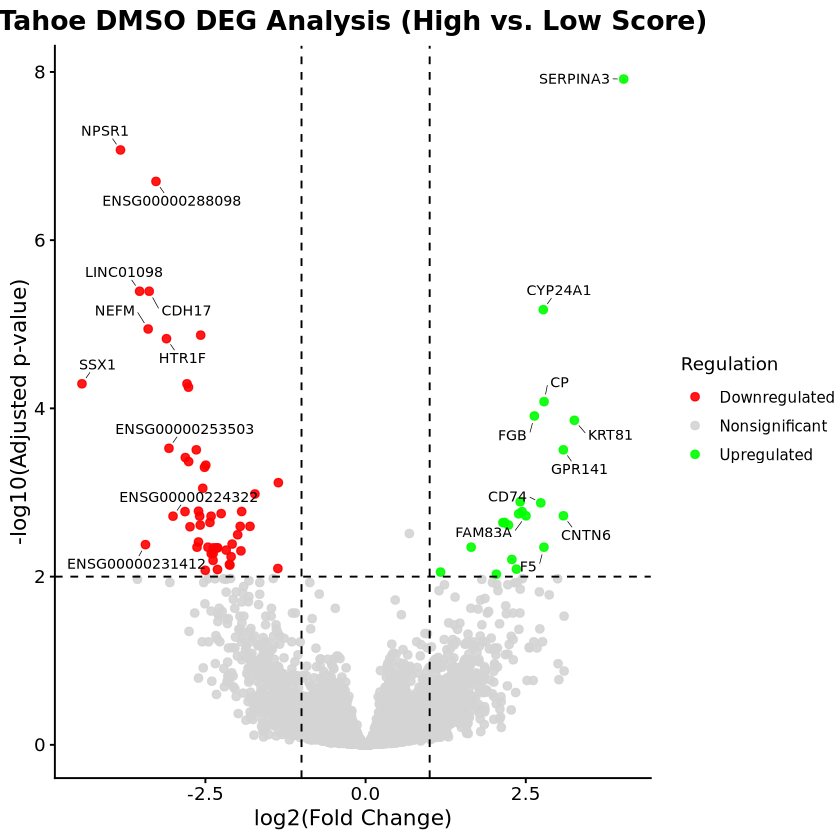

In [35]:
# Step 1: Categorize genes
res_df <- res_df %>%
  mutate(
    category = case_when(
      padj < 0.01 & log2FoldChange > 1 ~ "Upregulated",
      padj < 0.01 & log2FoldChange < -1 ~ "Downregulated",
      TRUE ~ "Nonsignificant"
    )
  )

# Step 2: Volcano plot with custom color legend
ggplot(res_df, aes(x = log2FoldChange, y = -log10(padj), color = category)) +
  geom_point(size = 2, alpha = 0.9) +
  geom_hline(yintercept = -log10(0.01), linetype = "dashed", color = "black") +
  geom_vline(xintercept = c(-1, 1), linetype = "dashed", color = "black") +

  # Highlight top genes
  geom_text_repel(
    data = top_genes,
    aes(x = log2FoldChange, y = -log10(padj), label = gene),
    color = "black",
    size = 3,
    max.overlaps = Inf,
    box.padding = 0.5,
    point.padding = 0.4,
    min.segment.length = 0,
    segment.size = 0.2
  ) +

  # Color scale
  scale_color_manual(
    values = c(
      "Upregulated" = "green",
      "Downregulated" = "red",
      "Nonsignificant" = "lightgray"
    ),
    name = "Regulation"
  ) +

  # Labels and theme
  labs(
    title = "Tahoe DMSO DEG Analysis (High vs. Low Score)",
    x = "log2(Fold Change)",
    y = "-log10(Adjusted p-value)"
  ) +
  theme_classic(base_size = 12) +
  theme(
    plot.title = element_text(size = 16, face = "bold", hjust = 0.5),
    axis.title = element_text(size = 13),
    axis.text = element_text(size = 11),
    legend.title = element_text(size = 11),
    legend.text = element_text(size = 9)
  )


The above results are used to get 196 DEGs and enrichment results were retreived using enrichr-KG

Get the list of DEGs

In [40]:
res_df <- as.data.frame(results(dds))   # res is DESeq2::results object
head(rownames(res_df))     

[1] "TSPAN6"   "TNMD"     "DPM1"     "SCYL3"    "C1orf112" "FGR"

In [42]:
res_df <- res_df %>%
  tibble::rownames_to_column("gene")
sign_df <- res_df[res_df$padj < 0.01 & abs(res_df$log2FoldChange) > 1, ]
top_up <- sign_df %>%
  dplyr::arrange(desc(log2FoldChange)) %>%
  dplyr::slice_head(n = min(100, nrow(.)))

top_down <- sign_df %>%
  dplyr::arrange(log2FoldChange) %>%
  dplyr::slice_head(n = min(100, nrow(.)))

top_genes <- dplyr::bind_rows(top_up, top_down)
head(top_genes)

,gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
16971...1,SERPINA3,275.40701,4.027750,0.5589533,7.205880,5.767030e-13,1.215690e-08
20156...2,KRT81,68.75128,3.258639,0.6114653,5.329230,9.863007e-08,1.386081e-04
6833...3,CNTN6,13.07486,3.087366,0.6614670,4.667453,3.049565e-06,1.890730e-03
16363...4,GPR141,13.84770,3.086387,0.5988083,5.154215,2.546951e-07,3.107710e-04
622...5,CP,88.51260,2.785451,0.5113872,5.446854,5.126865e-08,8.313409e-05
17815...6,F5,16.61080,2.782963,0.6334417,4.393401,1.115911e-05,4.470099e-03


In [44]:
genes <- na.omit(top_genes$gene)
writeLines(genes, '../results/top_200_degs_tahoe_dmso.txt')